CODE BLOCK: 1

In [ ]:
import torch
# torch library used for building models and training them and deploying them
import torch.nn as nn
# nn stands for neural networks, which contains all the modules & buiding blocks of neural networks.
# nn contain all classes, codes
import torch.nn.functional as F
# nn.functional is the subset of nn, where it contains all hte funtions like activation, loss functions
import torch.optim as optim
# contains the opimitizer that updates the parameers
from torchvision import datasets, transforms
# imports all datasets, transformations from torchvision

In [ ]:
#  Write a neural network that takes in 3 images of dimensions: (3, 32, 32), (8, 48, 48) and (1, 16, 16) and outputs 10 neurons (10 classes).
#  You can use any kind of network. (mandatory)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()

    self.linear1 = nn.Linear(3*32*32,512)
    self.linear12 = nn.Linear(512,128)

    self.linear2 = nn.Linear(1*16*16,128)
    self.linear22 = nn.Linear(128,128)
    
    self.linear3 = nn.Linear(8*48*48,1024)
    self.linear32 = nn.Linear(1024,256)
    self.linear33 = nn.Linear(256,128)

    self.final_fc = nn.Linear(128*3,256)
    self.final_fc1 = nn.Linear(256,10)
  
  def forward(self,x1,x2,x3):
    x1  = self.linear12(self.linear1(x))

    x2= self.linear22(self.linear2(x))

    x3 = self.linear33(self.linear32(self.linear3(x)))

    x = torch.cat((x1,x2,x3),dim=1)
    x = self.final_fc1(self.final_fc(x))

    return x 


In [ ]:
model = NeuralNet()
model

NeuralNet(
  (linear1): Linear(in_features=3072, out_features=512, bias=True)
  (linear12): Linear(in_features=512, out_features=128, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear22): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=18432, out_features=1024, bias=True)
  (linear32): Linear(in_features=1024, out_features=256, bias=True)
  (linear33): Linear(in_features=256, out_features=128, bias=True)
  (final_fc): Linear(in_features=384, out_features=256, bias=True)
  (final_fc1): Linear(in_features=256, out_features=10, bias=True)
)

CODE BLOCK: 2

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
# checks whether gpu si available or not
print("CUDA Available?", cuda)
# prints device

CUDA Available? True


CODE BLOCK: 3

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms) # True to False, train_transforms to test_transforms

100%|██████████| 9912422/9912422 [00:00<00:00, 322670034.26it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 98085582.04it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 146840447.51it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 19321023.09it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
len(train_data),len(test_data) 

(60000, 10000)

CODE BLOCK: 5

In [ ]:
batch_size = 512
#  batch size kept as 512
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}
# keyword arguments ued in python, which is passed as a parameter at the end.
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs) # train_data to test_data

In [ ]:
len(train_loader)

118

In [ ]:
118*512

60416

CODE BLOCK: 6

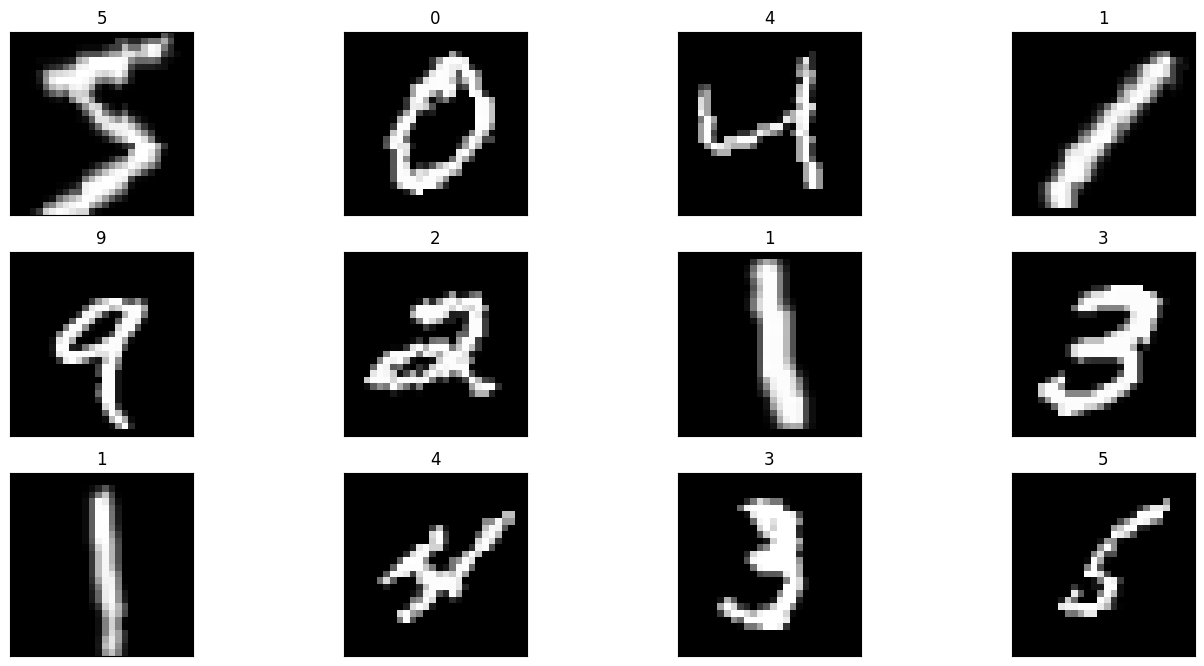

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure(figsize=(14,7))

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    '''
    n_out = (n_in + 2P - K)/s + 1 
    r_out = rin + j_in*(K-1)
    j_out = j_in*S 
    j_in = r_in
    '''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3,bias=False)
        # paramters : 32*9 + 32 = 320
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3,bias=False)
        # parameters: 64*9*32 + 64 = 18432, 18496
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3,bias=False)
        # parameters: 9*64*128 + 128 = 73728, 73856
        self.conv4 = nn.Conv2d(128, 512, kernel_size=3,bias=False)
        # parameters: 512*128*9 + 512
        self.fc1 = nn.Linear(512*4*4, 50,bias=False)
        self.fc2 = nn.Linear(50, 10, bias=False)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # removed ,2
        # n_in = 1, r_in = 1, J_in = 1, S = 1, n_out = 26, r_out = 1 + 1(2) = 3
        # parameters added
        x = F.relu(F.max_pool2d(self.conv2(x), 2)) 
        # Conv : n_in = 26, r_in = 3, J_in = 1, S=1, n_out = 24, r_out = 3 + (2)*1 = 5, J_out = 1
        # MaxPool: n_in = 24, r_in = 5,J_in = 1,S=1, n_out = (24-2)/2 + 1 = 12, r_out = 5 + (2-1)*1 = 6, J_out = 2
        x = F.relu(self.conv3(x)) # removed ,2
        # n_in = 12, r_in = 6, J_in = 2, S = 1 ,n_out = 10, r_out = 6 + (3-1)*2 = 10, J_out = 2
        x = F.relu(F.max_pool2d(self.conv4(x), 2)) 
        # Conv: n_in = 10, r_in = 10, J_in = 2, S = 1, n_out = 8, r_out = 10 + 1 = 11, J_out = 2 
        # MaxPool: n_in = 8, r_in = 11, j_in = 2, S = 2, n_out = (8-2)/2 + 1 = 4, r_out = 11 + (2-1)*2 = 13, J_out = 4
        x = x.view(-1,512*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

CODE BLOCK: 8

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 8

In [ ]:

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer):
  model.train() # settting model to train mode 
  pbar = tqdm(train_loader) # For GUI, performance metric

  train_loss = 0 # train_los
  correct = 0
  processed = 0
    
  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad() # settting optimizer value as zero, as there might be the accumulation of previous batch gradients as if not zero_grad()
  
    # Predict
    pred = model(data)

    # Calculate loss
    loss = F.nll_loss(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward() # Backpropogation
    optimizer.step() # updates the parameter
    
    correct += GetCorrectPredCount(pred, target) # comparison of target, preidction,
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader):
    model.eval() # set model to evaluation mode

    test_loss = 0
    correct = 0

    with torch.no_grad(): # No test data lekaage happens, no gardient calc. happpens bcause of this line.
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
     

CODE BLOCK: 9

In [ ]:
# adding 1 lines of code
device = "cuda" if cuda else "CPU"
model = Net().to(device) # device --> cuda
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # lr from 10.01 to 0.01
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1, verbose=True) # stepsize from 15 to 2
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader) # train_loader to test_loader
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.1065 Batch_id=19 Accuracy=15.73: 100%|██████████| 20/20 [00:04<00:00,  4.55it/s]


Test set: Average loss: 2.0920, Accuracy: 23338/60000 (38.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.0079 Batch_id=19 Accuracy=53.96: 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]


Test set: Average loss: 2.0521, Accuracy: 19756/60000 (32.93%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=1.8054 Batch_id=19 Accuracy=43.62: 100%|██████████| 20/20 [00:02<00:00,  7.69it/s]


Test set: Average loss: 1.8036, Accuracy: 30198/60000 (50.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=1.1266 Batch_id=19 Accuracy=62.84: 100%|██████████| 20/20 [00:02<00:00,  7.73it/s]


Test set: Average loss: 1.2283, Accuracy: 40255/60000 (67.09%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 5


Train: Loss=1.0101 Batch_id=19 Accuracy=72.20: 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]


Test set: Average loss: 1.1582, Accuracy: 40976/60000 (68.29%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 6


Train: Loss=0.9853 Batch_id=19 Accuracy=73.25: 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]


Test set: Average loss: 1.0862, Accuracy: 41826/60000 (69.71%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 7


Train: Loss=0.9359 Batch_id=19 Accuracy=73.96: 100%|██████████| 20/20 [00:02<00:00,  7.44it/s]


Test set: Average loss: 1.0820, Accuracy: 41857/60000 (69.76%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 8


Train: Loss=0.9978 Batch_id=19 Accuracy=74.14: 100%|██████████| 20/20 [00:02<00:00,  7.33it/s]


Test set: Average loss: 1.0755, Accuracy: 41855/60000 (69.76%)

Adjusting learning rate of group 0 to 1.0000e-06.
Epoch 9


Train: Loss=0.8654 Batch_id=19 Accuracy=74.24: 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]


Test set: Average loss: 1.0707, Accuracy: 42009/60000 (70.02%)

Adjusting learning rate of group 0 to 1.0000e-06.
Epoch 10


Train: Loss=0.9499 Batch_id=19 Accuracy=74.25: 100%|██████████| 20/20 [00:03<00:00,  6.33it/s]


Test set: Average loss: 1.0722, Accuracy: 41917/60000 (69.86%)

Adjusting learning rate of group 0 to 1.0000e-07.
Epoch 11


Train: Loss=0.9465 Batch_id=19 Accuracy=74.26: 100%|██████████| 20/20 [00:03<00:00,  5.38it/s]


Test set: Average loss: 1.0744, Accuracy: 41825/60000 (69.71%)

Adjusting learning rate of group 0 to 1.0000e-07.
Epoch 12


Train: Loss=0.9292 Batch_id=19 Accuracy=74.27: 100%|██████████| 20/20 [00:03<00:00,  6.43it/s]


Test set: Average loss: 1.0711, Accuracy: 42006/60000 (70.01%)

Adjusting learning rate of group 0 to 1.0000e-08.
Epoch 13


Train: Loss=0.9154 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:02<00:00,  7.79it/s]


Test set: Average loss: 1.0725, Accuracy: 41887/60000 (69.81%)

Adjusting learning rate of group 0 to 1.0000e-08.
Epoch 14


Train: Loss=1.0092 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


Test set: Average loss: 1.0740, Accuracy: 41824/60000 (69.71%)

Adjusting learning rate of group 0 to 1.0000e-09.
Epoch 15


Train: Loss=0.9056 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:03<00:00,  5.87it/s]


Test set: Average loss: 1.0698, Accuracy: 41975/60000 (69.96%)

Adjusting learning rate of group 0 to 1.0000e-09.
Epoch 16


Train: Loss=0.8584 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:03<00:00,  6.48it/s]


Test set: Average loss: 1.0724, Accuracy: 41877/60000 (69.80%)

Adjusting learning rate of group 0 to 1.0000e-10.
Epoch 17


Train: Loss=0.9437 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]


Test set: Average loss: 1.0728, Accuracy: 41868/60000 (69.78%)

Adjusting learning rate of group 0 to 1.0000e-10.
Epoch 18


Train: Loss=0.9578 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:03<00:00,  5.70it/s]


Test set: Average loss: 1.0735, Accuracy: 41875/60000 (69.79%)

Adjusting learning rate of group 0 to 1.0000e-11.
Epoch 19


Train: Loss=0.9457 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:03<00:00,  5.65it/s]


Test set: Average loss: 1.0710, Accuracy: 41961/60000 (69.94%)

Adjusting learning rate of group 0 to 1.0000e-11.
Epoch 20


Train: Loss=0.9975 Batch_id=19 Accuracy=74.28: 100%|██████████| 20/20 [00:02<00:00,  7.56it/s]


Test set: Average loss: 1.0706, Accuracy: 41925/60000 (69.88%)

Adjusting learning rate of group 0 to 1.0000e-12.


Text(0.5, 1.0, 'Test Accuracy')

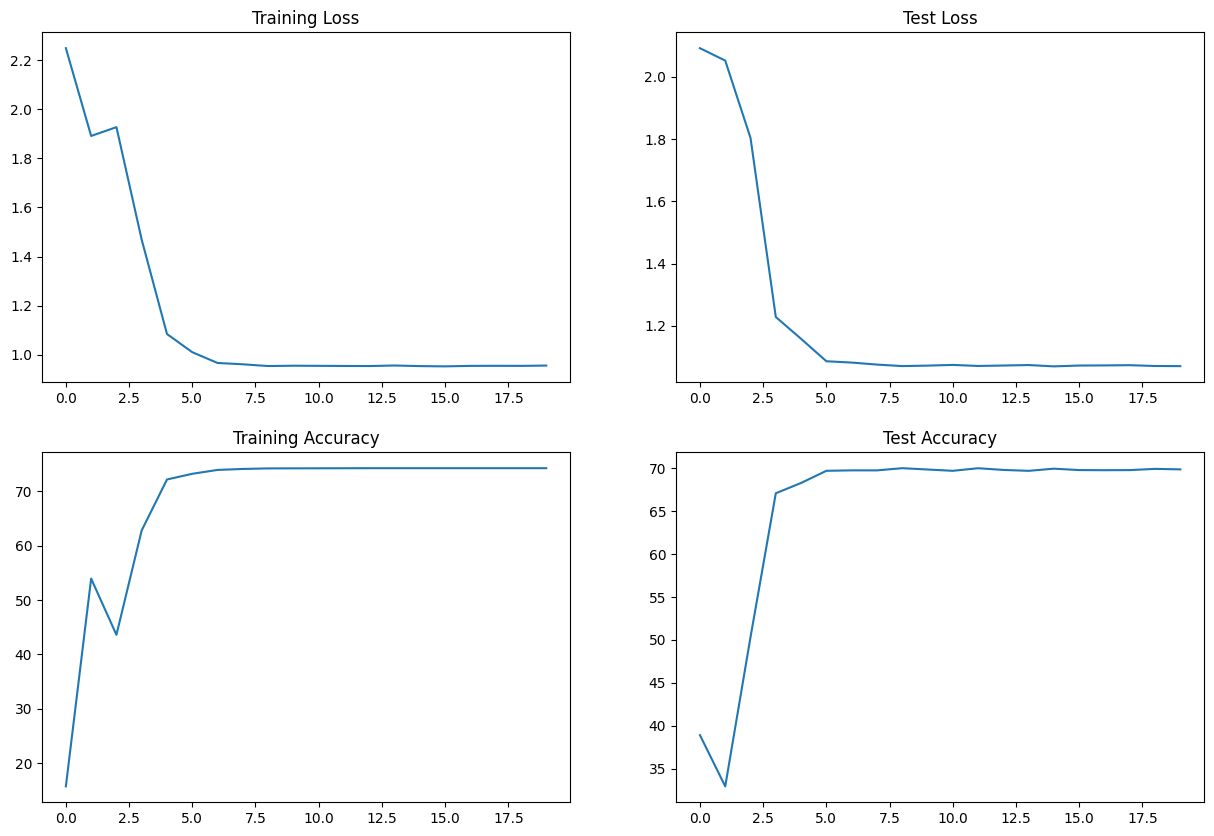

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 512, 8, 8]         589,824
            Linear-5                   [-1, 50]         409,600
            Linear-6                   [-1, 10]             500
Total params: 1,092,372
Trainable params: 1,092,372
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.79
Params size (MB): 4.17
Estimated Total Size (MB): 4.96
----------------------------------------------------------------


In [ ]:
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 26, 26]          18,496
            Conv2d-3          [-1, 128, 11, 11]          73,856
            Conv2d-4            [-1, 512, 9, 9]         590,336
            Linear-5                   [-1, 50]         409,650
            Linear-6                   [-1, 10]             510
================================================================
Total params: 1,093,168
Trainable params: 1,093,168
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.96
